<a href="https://colab.research.google.com/github/Lyxthor/ML-Practice-Sem-4/blob/main/minggu-10/Bootcamp_QMatics_minggu_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/Datasets/cvd_data.csv')

Mounted at /content/drive


In [ ]:
X = df.drop('diagnosis_result', axis=1)
y = df['diagnosis_result']

Exploratori Data Analisis

Preprocessing


In [ ]:
# Handling Outliers
# Uji Statistik Linearitas - Untuk Menentukan Algoritma Model
# Data Model

Training Algoritma


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

In [ ]:
# JANGAN DI RUN!!!!
# Anggap data di bawah ini sudah berkualitas, jadi tidak perlu EDA, juga
# diketahui bahwa data punya pola non linear
# Normalisasi vs Split Train Data (Split dulu, data tes harus murni,
#  boleh di scale tidak boleh di fit)
# Normalisasi (StandarScaler, MinMaxScaller, RobustScaller)

X = StandardScaler().fit_transform(X) # Tidak Logis




NameError: name 'x' is not defined

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Random state artinya tidak bisa direproduksi lagi
scaller = RobustScaler()
X_train = scaller.fit_transform(X_train) # Logis
X_test = scaller.transform(X_test)
# Alasan logis dan tidak logis adalah, proses fitting harusnya dilakukan setelah split,
# Juga X_test tidak boleh di fit, hanya boleh di transform saja

In [ ]:
# MINGGU KE-2 : Handling Imbalance Data
# https://imbalanced-learn.org/stable/
# DISTRIBUSI KELAS ASLI
print(y_train.value_counts())
# CEK IMBALANCE DATA

diagnosis_result
1    50
0    30
Name: count, dtype: int64


In [ ]:
# Oversampling : Menaikkan jumlah data
# Undersampling : Menurunkan jumlah data
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_res, y_train_res = smote.fit_resample(X_train, y_train) # Harus dimasukkan ke variable baru res

# Distribusi Data Baryu
print(y_train_res.value_counts())

# Resampling menciptakan data baru sesuai dengan bobot-bobot feature, atau dengan kata lain
# Menciptakan data sesuai dengan pola datasets
# PCA mengurangi fitur datasets

diagnosis_result
0    50
1    50
Name: count, dtype: int64


In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
model = SVC()
model2 = GradientBoostingClassifier()

# Optimasi (menggunakan parameter tuning)
# Sepahamku : mencari parameter paling bagus, dalam sesi ini menggunakan grid search atau random search
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
# Beda Grid search dan random search. Grid mencari kombinasi paling optimal
# Random search mencari kombinasi secara acak
from sklearn.model_selection import GridSearchCV # Bisa menggunakan RandomSearch
parameters = {
    "C" : [0.1, 0.01, 1],
    "kernel" : ["linear", "poly", "rbf", "sigmoid"],
    "gamma" : ["scale", "auto"]
}
parameters2 = {
    "loss" : ["log_loss", "exponential"],
    "learning_rate" : [0.01, 0.1, 1],
    "n_estimators" : [10, 50, 100],


}
grid = GridSearchCV(model, param_grid=parameters, cv=5)
grid = grid.fit(X_train_res, y_train_res)
best_model2 = grid.best_estimator_

print("Best parameters", grid.best_params_)
best_model2.fit(X_train_res, y_train_res)



Best parameters {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}


SVC(C=1, kernel='linear')

Evaluasi

In [ ]:
from sklearn.metrics import classification_report
# training
y_pred_train2 = best_model2.predict(X_train_res)
report_train2 = classification_report(y_train_res, y_pred_train2)
print(report_train2)

# testing
y_pred_test2 = best_model2.predict(X_test)
report_test2 = classification_report(y_test, y_pred_test2)
print(report_test2)

# NOTE :
# Analisis tidak boleh berdiri sendiri, tidak boleh terjadi bias majority.
# Bias majority terjadi karena datasets imbalance (misal : sebuah
# dataset yang mayoritas berisi data orang sakit dibanding data orang sehat
# maka hasil analisis tendensinya akan menghasilkan prediksi orang tersebut sakit)
# Untuk mengatasi hal ini maka perlu diperlukan analisis yang cermat dalam
# pembuatan model

              precision    recall  f1-score   support

           0       0.85      0.90      0.87        50
           1       0.89      0.84      0.87        50

    accuracy                           0.87       100
   macro avg       0.87      0.87      0.87       100
weighted avg       0.87      0.87      0.87       100

              precision    recall  f1-score   support

           0       0.75      0.75      0.75         8
           1       0.83      0.83      0.83        12

    accuracy                           0.80        20
   macro avg       0.79      0.79      0.79        20
weighted avg       0.80      0.80      0.80        20



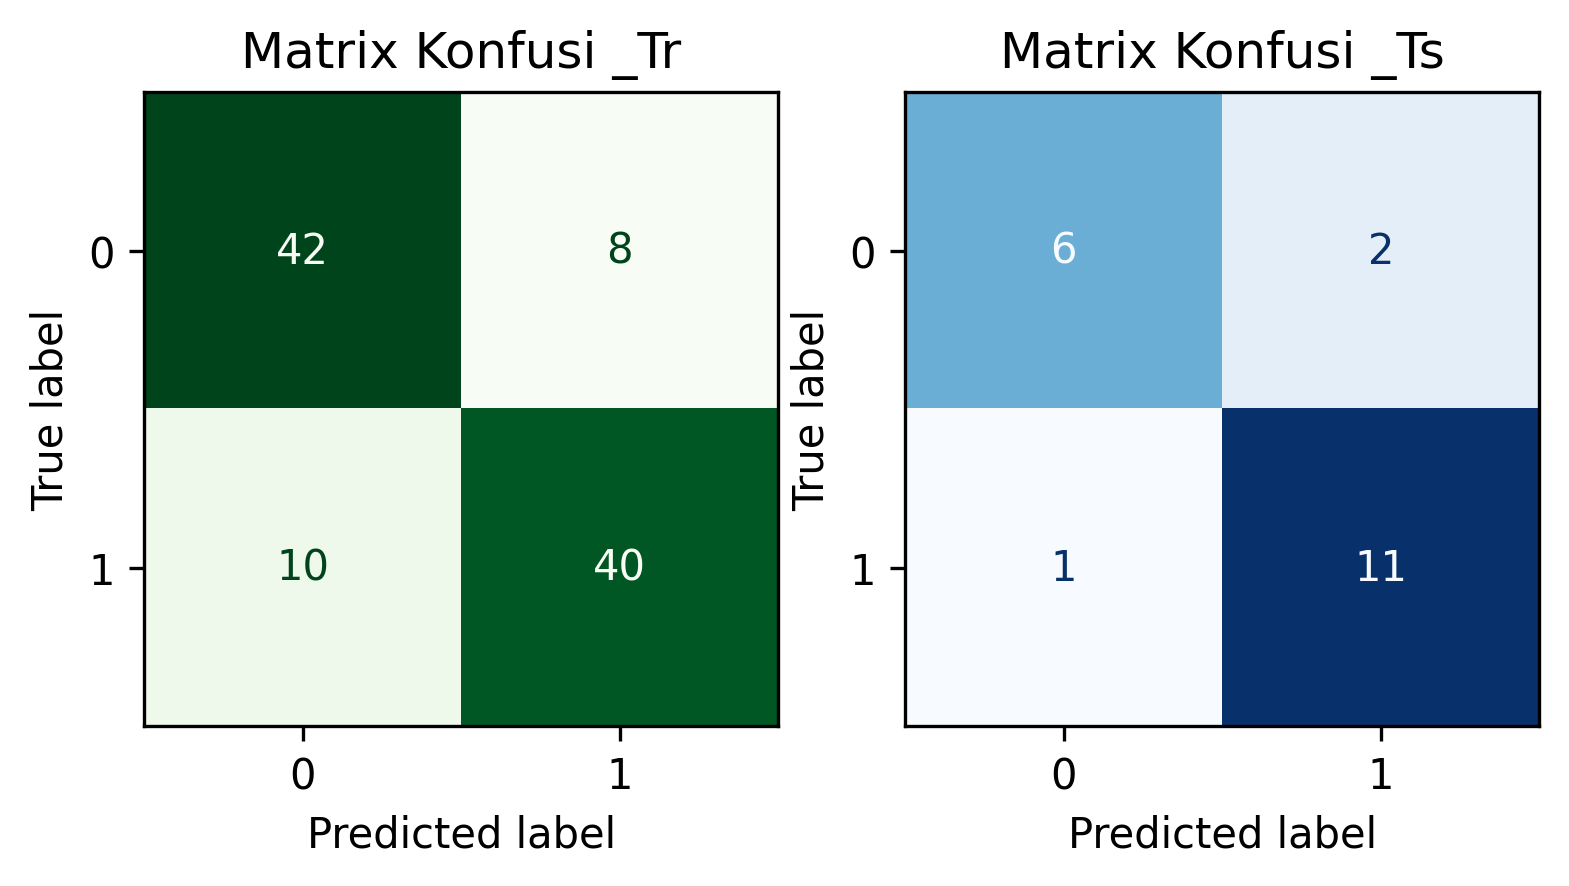

In [ ]:
# Matric konfolusi untuk training
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, axes = plt.subplots(1, 2, figsize=(6, 3), dpi=300)

cm_tr = confusion_matrix(y_train_res, y_pred_train2)
disp_tr = ConfusionMatrixDisplay(confusion_matrix=cm_tr)
disp_tr.plot(ax=axes[0], cmap="Greens", colorbar=False)
axes[0].set_title("Matrix Konfusi _Tr")

# Untuk test
cm_ts = confusion_matrix(y_test, y_pred_test2)
disp_ts = ConfusionMatrixDisplay(confusion_matrix=cm_ts)
disp_ts.plot(ax=axes[1], cmap="Blues", colorbar=False)
axes[1].set_title("Matrix Konfusi _Ts")

plt.show()

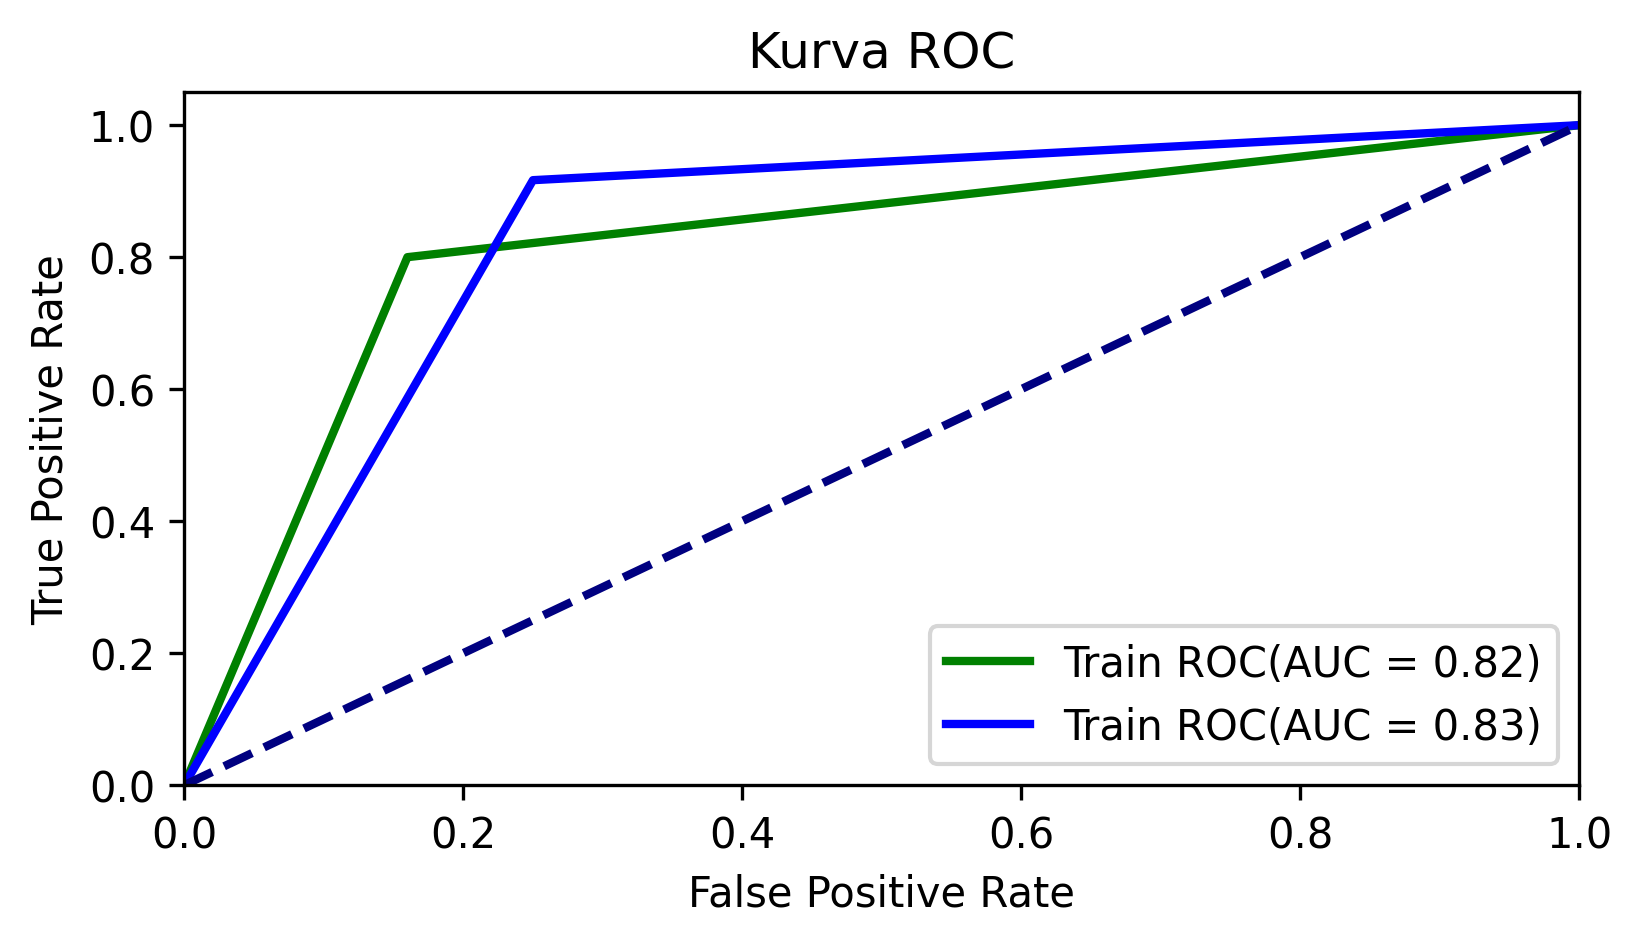

In [ ]:
# Kurva ROC(AOC)
from sklearn.metrics import roc_curve, auc, roc_auc_score

fpr_tr, tpr_tr, _ = roc_curve(y_train_res, y_pred_train2)
roc_auc_tr = auc(fpr_tr, tpr_tr)

fpr_ts, tpr_ts, _ = roc_curve(y_test, y_pred_test2)
roc_auc_ts = auc(fpr_ts, tpr_ts)

plt.figure(figsize=(6, 3), dpi=300)
plt.plot(fpr_tr, tpr_tr, lw=2, color="Green", label=f"Train ROC(AUC = {roc_auc_tr:0.2f})")
plt.plot(fpr_ts, tpr_ts, lw=2, color="Blue", label=f"Train ROC(AUC = {roc_auc_ts:0.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Kurva ROC")
plt.legend(loc="lower right")
plt.show()

In [ ]:
# MINGGU KE-2 : IMBALANCE DATASETS

# Imbalance Datasets :
# Terdiri dari bias majority(oversampling) dan bias minority(undersampling)
# Data imbalance adalah proporsi kelas data yang tidak seimbang, mis : 70%, 30%
# Agar seimbang, maka proporsi harus dibuat mendekati seimbang, misal : 49%, 51%

# Handling Imbalance Data sebaiknya dilakukan setelah splitting data, dimana
# handling imbalance data sebaiknya dilakukan pada data training sahaja.
# Melakukan pemrosesan data pada data test akan menyebabkan data leakage

# Pada supervise learning : terdapat konsep  bernama data augmentasi, regresi dan
# klasifikasi memiliki teknik yang berbeda. Regresi : virtual sampling = data synthetic
#  (Gaussian )
# Klasifikasi : resampling = dataimbalance(Oversampling, undersampling)